<a href="https://colab.research.google.com/github/kinNomi/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [51]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
urls = [url, url2, url3, url4]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingreso total por cada tienda

In [38]:
tienda1_ingreso = tienda["Precio"].sum()
tienda2_ingreso = tienda2["Precio"].sum()
tienda3_ingreso = tienda3["Precio"].sum()
tienda4_ingreso = tienda4["Precio"].sum()
print(f'Ingresos totales TIENDA 1: ${tienda1_ingreso:.2f}')
print(f'Ingresos totales TIENDA 2: ${tienda2_ingreso:.2f}')
print(f'Ingresos totales TIENDA 3: ${tienda3_ingreso:.2f}')
print(f'Ingresos totales TIENDA 4: ${tienda4_ingreso:.2f}')
print(f'Total ingresos: ${(tienda1_ingreso + tienda2_ingreso + tienda3_ingreso + tienda4_ingreso):.2f}')

Ingresos totales TIENDA 1: $1150880400.00
Ingresos totales TIENDA 2: $1116343500.00
Ingresos totales TIENDA 3: $1098019600.00
Ingresos totales TIENDA 4: $1038375700.00
Total ingresos: $4403619200.00


# 2. Ventas por categoría

In [39]:
#función para obtener las ventas por categoría de cada tienda
def ventas_por_categoria(tienda, num_tienda):
    ventas = tienda.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nVentas por categoría en Tienda {num_tienda}:")
    print(ventas)

#mostrar resultados de cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               

In [40]:
#función para obtener la calificación promedio de la tienda
def calificacion_promedio(tienda, num_tienda):
    promedio = tienda['Calificación'].mean()
    print(f"\nCalificación promedio de la tienda {num_tienda}: {promedio: .2f}")

#mostrar resultados de cada tienda
calificacion_promedio(tienda, 1)
calificacion_promedio(tienda2, 2)
calificacion_promedio(tienda3, 3)
calificacion_promedio(tienda4, 4)




Calificación promedio de la tienda 1:  3.98

Calificación promedio de la tienda 2:  4.04

Calificación promedio de la tienda 3:  4.05

Calificación promedio de la tienda 4:  4.00


# 4. Productos más y menos vendidos

In [41]:
#se agrega una columna (Tienda) en todos los CSVs
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

#se asigna el tipo de datos que se usan
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

#se calcula el ingreso
df_total['Ingreso'] = df_total['Precio']

In [42]:
#se agrupa por tienda y producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

#función que muestra los 3 productos más y menos vendidos de una tienda
def top_productos(tienda):
  data = ventas[ventas['Tienda'] == tienda]
  top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
  top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

  print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
  for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

  print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
  for _, fila in top_menos_vendidos.iterrows():
      print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

#lista de tiendas
lista_tiendas = ventas['Tienda'].unique()

#mostrar resultados de cada tienda
for tienda in lista_tiendas:
  top_productos(tienda)



Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

# 5. Envío promedio por tienda

In [43]:
#definir el tipo de dato
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

#se agrupa por tienda y se calcula el promiedo de costo por envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

#mostrar resultados
print("Envío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")

Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


In [53]:
ventas_por_categoria_tienda1 = tienda['Categoría del Producto'].value_counts()
print("Ventas por categoría en Tienda 1:")
display(ventas_por_categoria_tienda1)

ventas_por_categoria_tienda2 = tienda2['Categoría del Producto'].value_counts()
print("\nVentas por categoría en Tienda 2:")
display(ventas_por_categoria_tienda2)

ventas_por_categoria_tienda3 = tienda3['Categoría del Producto'].value_counts()
print("\nVentas por categoría en Tienda 3:")
display(ventas_por_categoria_tienda3)

ventas_por_categoria_tienda4 = tienda4['Categoría del Producto'].value_counts()
print("\nVentas por categoría en Tienda 4:")
display(ventas_por_categoria_tienda4)

Ventas por categoría en Tienda 1:


,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171



Ventas por categoría en Tienda 2:


,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181



Ventas por categoría en Tienda 3:


,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177



Ventas por categoría en Tienda 4:


,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


#6. Generando gráfico

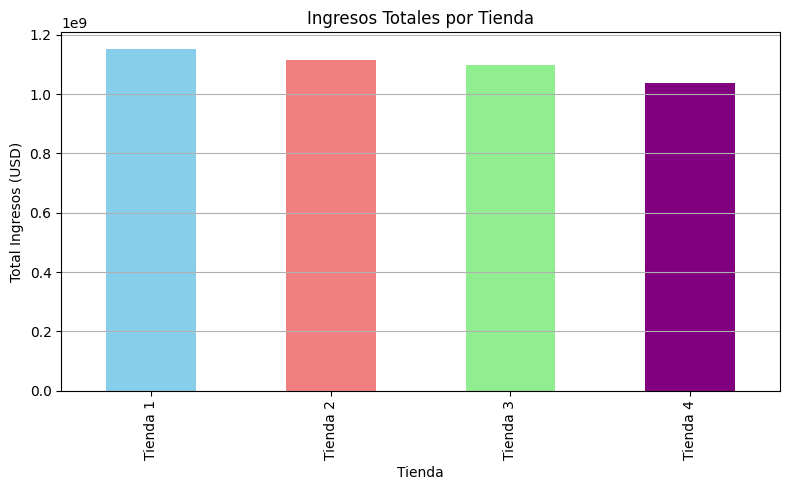

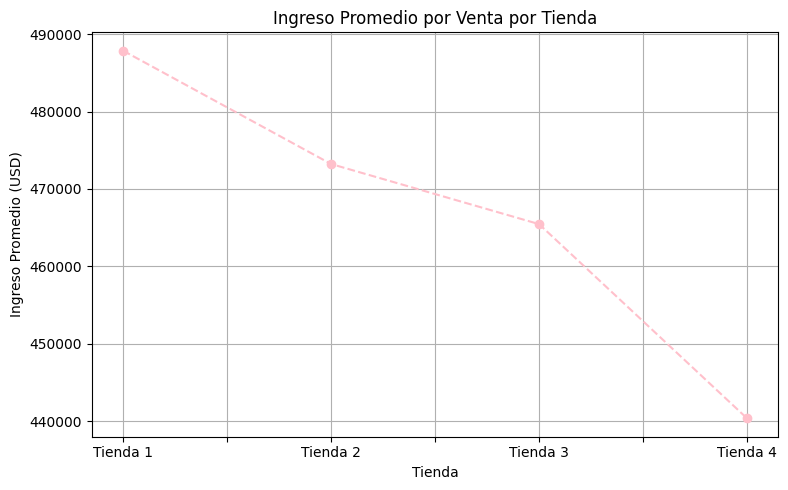

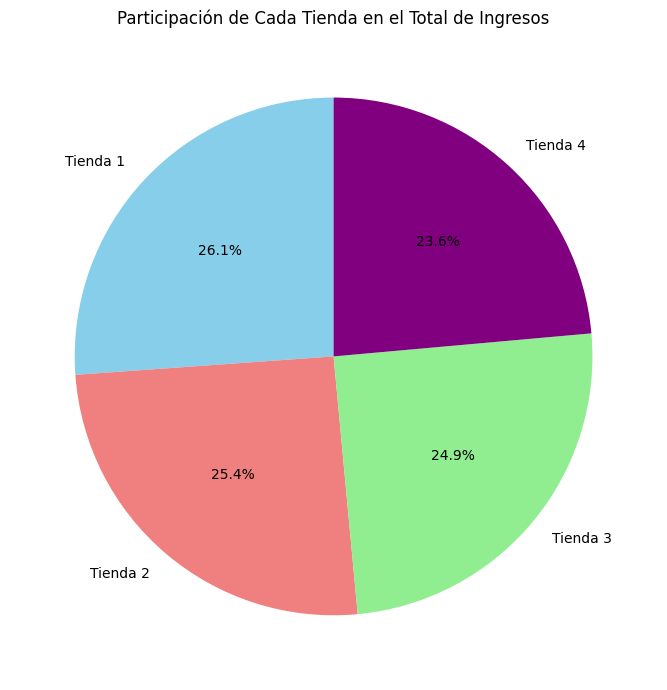

In [64]:
import matplotlib.pyplot as plt

#definir tipo de datos
df_total['Precio'] = df_total['Precio'].astype(float)

df_total['Precio'] = df_total['Precio'].astype(float)

df_total['Ingreso'] = df_total['Precio']

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# 1. Barra vertical: Total de ingresos
plt.figure(figsize=(8,5))
colores = ['skyblue', 'lightcoral', 'lightgreen', 'purple'] # Define una lista de colores
ingresos_totales.plot(kind='bar', color=colores) # Asigna los colores a las barras
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Línea: Promedio de ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='pink')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Torta/Pie: Distribución del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Informe final

### Introducción

El presente informe tiene como objetivo analizar el rendimiento de cuatro tiendas con el fin de recomendar al Sr. Juan cuál de ellas sería la más adecuada para vender, considerando diversos factores como ingresos, ventas por categoría, calificaciones de clientes, productos más y menos vendidos, y costos de envío.

### Análisis de Datos y Visualizaciones

Se han analizado los datos de las cuatro tiendas, y los hallazgos clave se presentan a continuación:

**1. Ingresos Totales por Tienda:**

Como se observa en el gráfico de barras, la **Tienda 1** generó los mayores ingresos totales, seguida por la Tienda 2, Tienda 3 y Tienda 4.

**2. Ventas por Categoría:**

Al analizar las ventas por categoría en cada tienda, se observa que ciertas categorías como "Electrónicos" y "Muebles" son consistentemente fuertes en todas las tiendas en términos de ingresos. La distribución de las ventas por categoría varía ligeramente entre tiendas, lo que podría indicar diferentes preferencias de los clientes o estrategias de inventario.

**3. Calificaciones Promedio de los Clientes:**

Las calificaciones promedio de los clientes son bastante similares entre las tiendas, todas rondando el 4.0. Esto sugiere que, en general, los clientes tienen una satisfacción similar con el servicio y los productos en las cuatro ubicaciones.

**4. Productos Más y Menos Vendidos:**

El análisis de los productos que generaron más y menos ingresos en cada tienda reveló que productos como "TV LED UHD 4K", "Refrigerador" e "Iphone 15" se encuentran consistentemente entre los más vendidos en la mayoría de las tiendas. Por otro lado, productos de menor valor, como "Cuerda para saltar" o "Cubo mágico 8x8", tienden a generar menos ingresos.

**5. Coste de Envío Promedio por Tienda:**

El costo de envío promedio varía entre las tiendas, siendo la **Tienda 4** la que presenta el costo promedio más bajo, seguida por la Tienda 3, Tienda 2 y Tienda 1.

### Conclusión

Considerando todos los factores analizados, se recomienda al Sr. Juan que venda la **Tienda 4**. Aunque en la **Tienda 1** el costo de envío promedio es ligeramente más alto en comparación con las otras tiendas, la Tienda 1 destaca significativamente en la generación de ingresos totales, lo que sugiere una mayor actividad comercial y una base de clientes sólida. Además, las calificaciones promedio de los clientes son comparables a las de las otras tiendas, lo que indica un nivel de satisfacción similar. La consistencia en las ventas de productos clave también es un punto a favor.

Si bien la Tienda 4 tiene el costo de envío promedio más bajo, sus ingresos totales son los menores. Las Tiendas 2 y 3 se encuentran en un punto intermedio en cuanto a ingresos y costos de envío.